In [81]:
import tensorflow
from  tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [55]:
'''#Con esto he generado más imagenes rotandolas veces cada una y así obtengo más para el entrenamiento

import os
from PIL import Image

# Especifica la carpeta que contiene las imágenes originales
data_folder = 'dataframe/logo'

# Itera sobre las subcarpetas de la carpeta principal
for subfolder in os.listdir(data_folder):
    subfolder_path = os.path.join(data_folder, subfolder)
    
    # Itera sobre los archivos de imagen en la subcarpeta
    for filename in os.listdir(subfolder_path):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            input_path = os.path.join(subfolder_path, filename)
            
            # Abre la imagen original
            image = Image.open(input_path)
            
            # Itera sobre 12 grados diferentes de rotación
            for i in range(12):
                # Rotar la imagen
                rotated_image = image.rotate(i * 360 / 30)
                
                # Guardar la imagen rotada en la misma carpeta que la imagen original
                output_path = os.path.join(subfolder_path, f'{filename}_{i}.png')
                rotated_image.save(output_path)'''

"#Con esto he generado más imagenes rotandolas veces cada una y así obtengo más para el entrenamiento\n\nimport os\nfrom PIL import Image\n\n# Especifica la carpeta que contiene las imágenes originales\ndata_folder = 'dataframe/logo'\n\n# Itera sobre las subcarpetas de la carpeta principal\nfor subfolder in os.listdir(data_folder):\n    subfolder_path = os.path.join(data_folder, subfolder)\n    \n    # Itera sobre los archivos de imagen en la subcarpeta\n    for filename in os.listdir(subfolder_path):\n        if filename.endswith('.png') or filename.endswith('.jpg'):\n            input_path = os.path.join(subfolder_path, filename)\n            \n            # Abre la imagen original\n            image = Image.open(input_path)\n            \n            # Itera sobre 12 grados diferentes de rotación\n            for i in range(12):\n                # Rotar la imagen\n                rotated_image = image.rotate(i * 360 / 30)\n                \n                # Guardar la imagen rotada

### Exploración y preparación

In [82]:
def load_data(data_folder):
    # Especifica la carpeta que contiene las imágenes
    data_folder = 'dataframe/logo'
    return data_folder

def show_images(data_folder):
    classes = os.listdir(data_folder)
    classes.sort()
    print(f'{len(classes)} classes:')
    fig = plt.figure(figsize=(8, 15))
    for i, sub_dir in enumerate(classes, 1):
        sub_dir_path = os.path.join(data_folder, sub_dir)
        img_files = [f for f in os.listdir(sub_dir_path) if f.endswith('.png') or f.endswith('.jpg')]
        if len(img_files) == 0:
            continue
        img_file = img_files[0]
        img_path = os.path.join(sub_dir_path, img_file)
        img = mpimg.imread(img_path)
        a = fig.add_subplot(1, len(classes), i)
        a.axis('off')
        imgplot = plt.imshow(img)
        a.set_title(img_file)
    plt.show()



3 classes:


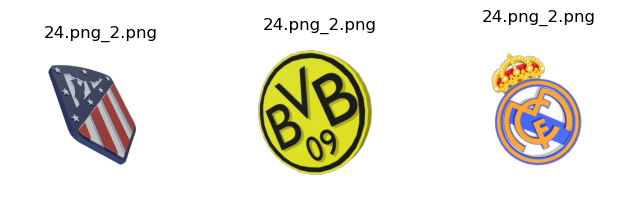

In [94]:
data_folder = 'dataframe/logo'
show_images(data_folder)

In [85]:
def prepare_data(img_size, batch_size, validation_split):
    print("Getting Data...")
    datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                                validation_split=0.3) # hold back 30% of the images for validation

    print("Preparing training dataset...")
    train_generator = datagen.flow_from_directory(
        data_folder,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training') # set as training data

    print("Preparing validation dataset...")
    validation_generator = datagen.flow_from_directory(
        data_folder,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation') # set as validation data

    classnames = list(train_generator.class_indices.keys())
    print('Data generators ready')

    return train_generator, validation_generator, classnames

In [98]:
# Define el tamaño de las imágenes, el tamaño del lote y el porcentaje de validación
img_size = (128, 128)
batch_size = 30
validation_split = 0.3

# Prepara los datos de entrenamiento y validación
train_generator, validation_generator, classnames = prepare_data(img_size, batch_size, validation_split)


Getting Data...
Preparing training dataset...
Found 657 images belonging to 3 classes.


Preparing validation dataset...
Found 279 images belonging to 3 classes.
Data generators ready


### CNN

In [92]:
def build_model(train_generator):
    print("Building model...")
    model = Sequential([
        Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (6, 6), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (6, 6), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),
        Flatten(),
        Dense(train_generator.num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

def train_model(model, train_generator, validation_generator, num_epochs):
    print("Training model...")
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size,
        epochs=num_epochs
    )
    return history

In [96]:
# Construye el modelo
model = build_model(train_generator)

# Entrena el modelo
num_epochs = 5
history = train_model(model, train_generator, validation_generator, num_epochs)

Building model...


/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 123, 123, 32)   │         3,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 56, 56, 32)     │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 23, 23, 32)     │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │        11,619 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,899 (347.26 KB)

 Trainable params: 88,899 (347.26 KB)

 Non-trainable params: 0 (0.00 B)

None
Training model...
Epoch 1/5


/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 298ms/step - accuracy: 0.5880 - loss: 0.7832 - val_accuracy: 1.0000 - val_loss: 0.0708
Epoch 2/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0190 - val_accuracy: 1.0000 - val_loss: 0.0171
Epoch 3/5


2024-04-21 20:24:49.537851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-04-21 20:24:49.560484: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 299ms/step - accuracy: 0.9797 - loss: 0.0466 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 4/5
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 4.1188e-04
Epoch 5/5


2024-04-21 20:24:56.887087: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-21 20:24:56.910205: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 269ms/step - accuracy: 1.0000 - loss: 9.7009e-04 - val_accuracy: 1.0000 - val_loss: 2.1005e-04


### Evaluación

In [100]:
def plot_loss(history, num_epochs):
    epoch_nums = range(1, num_epochs + 1)
    training_loss = history.history["loss"]
    validation_loss = history.history["val_loss"]
    plt.plot(epoch_nums, training_loss)
    plt.plot(epoch_nums, validation_loss)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

def evaluate_model(model, validation_generator, classes):
    print("Generating predictions from validation data...")
    x_test = validation_generator[0][0]
    y_test = validation_generator[0][1]
    class_probabilities = model.predict(x_test)
    predictions = np.argmax(class_probabilities, axis=1)
    true_labels = np.argmax(y_test, axis=1)
    cm = confusion_matrix(true_labels, predictions)
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=85)
    plt.yticks(tick_marks, classes)
    plt.xlabel("Predicted Team")
    plt.ylabel("Actual Team")
    plt.show()
    print("Evaluating model accuracy...")
    test_loss, test_accuracy = model.evaluate(validation_generator)
    print('Test loss:', test_loss)
    print('Test accuracy:', test_accuracy)


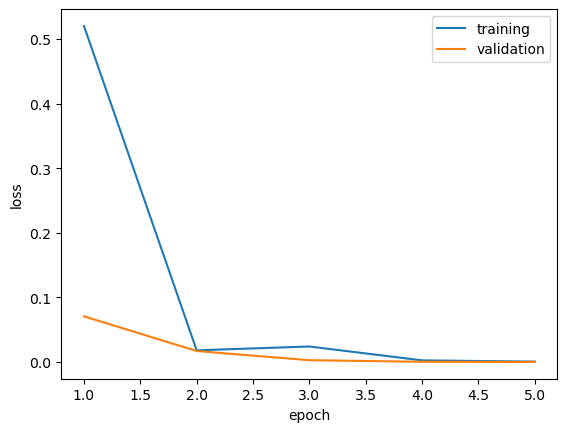

Generating predictions from validation data...


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


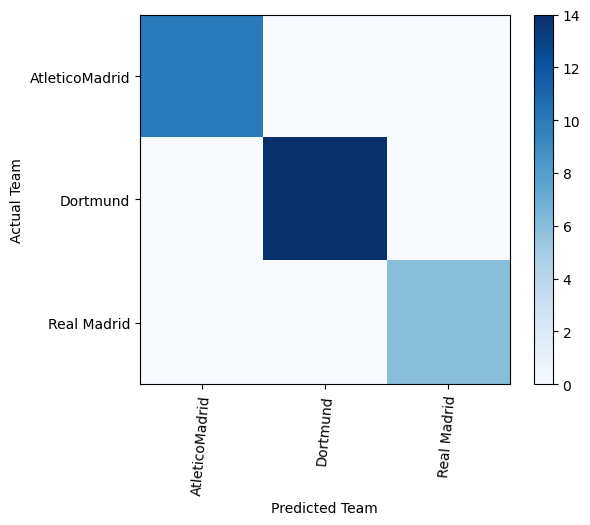

Evaluating model accuracy...
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 1.0000 - loss: 4.7142e-05

/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 1.0000 - loss: 1.8409e-04
Test loss: 0.000198936861124821
Test accuracy: 1.0


In [101]:
plot_loss(history, num_epochs)
evaluate_model(model, validation_generator, classnames)

In [102]:
# Save the trained model
modelFileName = 'modelos/logo_classifier.keras'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as modelos/logo_classifier.keras
